# CLASSIFICATION
  - **Method**: K Nearest Neighbor
  - **Database**: Breast Cancer
  - **Objective**: Classify malignant and benign tumors

# Part 1: Exploratory Data Analysis


In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. 

* How many features do we have in this dataset? 30
* What are the target classes? [0,1]
* What do these target classes signify?  ['malignant', 'benign']
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = dataset.data
X_titles = dataset.feature_names
y = dataset.target
y_titles = dataset.target_names
df=pd.DataFrame(X,columns=X_titles)
df['target'] = y

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
print('number of features = ',X[0,:].size)
print('target classes are = ',np.unique(y))
print('Respectively, target classes ',np.unique(y), ' signify ' ,y_titles)
print('number of participants tested `Malignant` is ', len( df[df['target'] == 0] ))
print('number of participants tested `benign` is ', len( df[df['target'] == 1] ))
print('\n number of missing values for each feature:','\n',  df.isnull().sum() )

number of features =  30
target classes are =  [0 1]
Respectively, target classes  [0 1]  signify  ['malignant' 'benign']
number of participants tested `Malignant` is  212
number of participants tested `benign` is  357

 number of missing values for each feature: 
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst com

Use `seaborn.implot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. We draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. We will do this once again for different features for the x- and y-axis and see how the data is distributed.

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. 

We then Standardize the data and plot those features again.

### Import necessary packages

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Plot of "**mean radius**" against "**mean texture**", color coded based on target value

<Figure size 360x360 with 0 Axes>

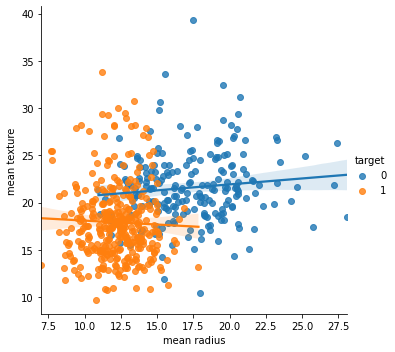

In [ ]:
plt.figure(figsize=(5,5))
sns.lmplot(x='mean radius',y='mean texture',hue='target',data=df)

### Plot of a few other features against each other, color coded based on target value

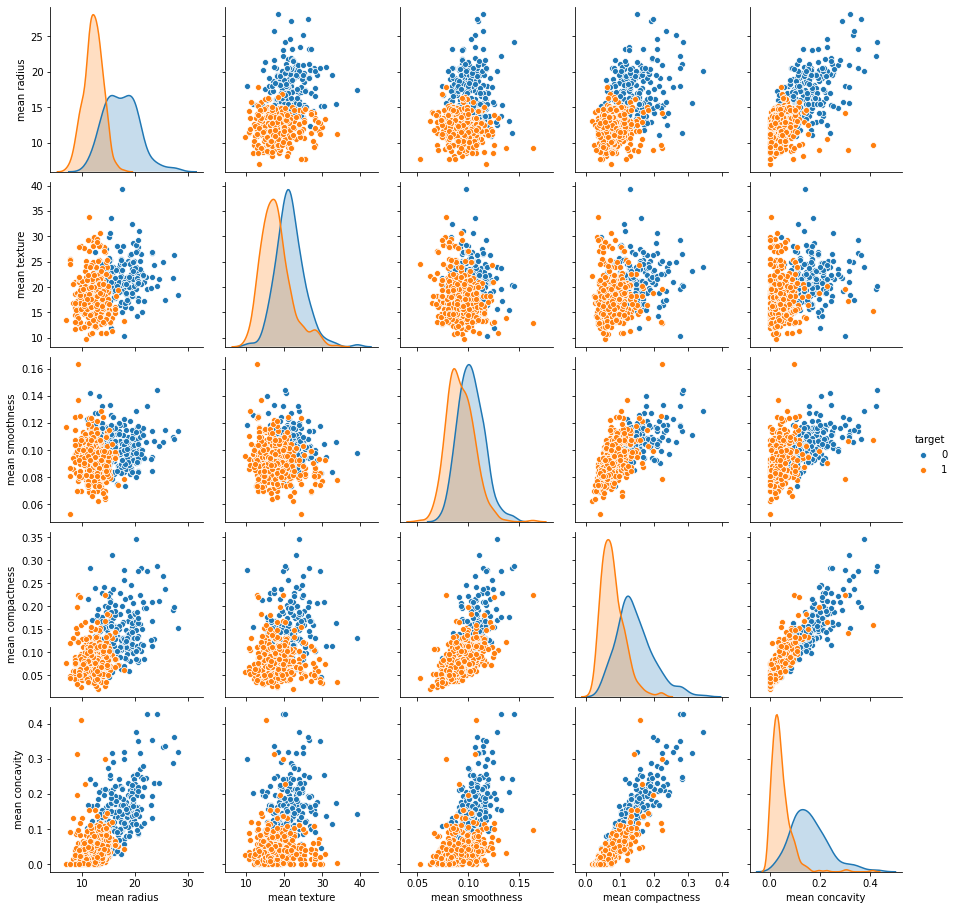

In [ ]:
sns.pairplot(df[np.append(X_titles[[0,1,4,5,6]],'target')],hue='target')

### Plot of two disproportionate features, ie., "worst area" and "worst smoothness", **before Standardization**

<Figure size 360x360 with 0 Axes>

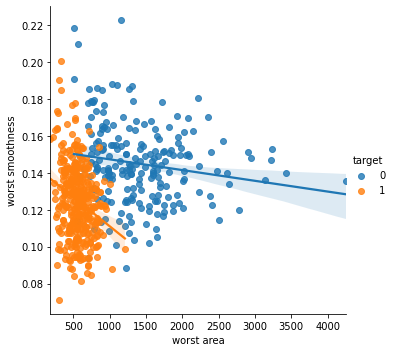

In [ ]:
plt.figure(figsize=(5,5))
sns.lmplot(x='worst area',y='worst smoothness',hue='target',data=df)

### Plot of two disproportionate features, **after Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardizer = StandardScaler()
standardizer

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_columns = standardizer.fit_transform(df[X_titles])
df_scaled = pd.DataFrame(scaled_columns,columns=X_titles)
df_scaled['target'] = df['target']
df_scaled.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,1


<Figure size 360x360 with 0 Axes>

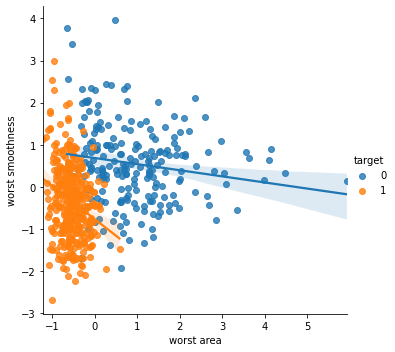

In [ ]:
plt.figure(figsize=(5,5))
sns.lmplot(x='worst area',y='worst smoothness',hue='target',data=df_scaled)

## Part 2: KNN Classifier
We are going to create a KNN classifier to predict whether a patient has a malignant or benign tumor. 


It is best practice to have a training set (from which there is a rotating validation subset) and test set. The main aim here is to obtain the best accuracy we can on the test set. To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data you send it (each of the folds is used as validation).

First, we split the dataset into a train and a test set (80:20). The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.
Follow these steps:

* Using cross-validation, we report mean cross-validation accuracy for a KNN classifier where you sweep k from 1 to 100. 

* Base on this plot (that we just ran), we will find the best 'k' and report your test accuracy.

* We will then randomly select 5 different 'k', and use them on the test set to see if the cross-validation really found a good 'k' for us.


### Import necessary packages

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(df[X_titles],df['target'],test_size=0.2,random_state=0)

In [ ]:
# number of neighbors [1 .. 100]
k_space = np.arange(100)+1
k_space

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# cross val score
def cv_score(k):
  knn1 = KNeighborsClassifier(n_neighbors=k)
  scores_mean = cross_val_score(knn1,X_train,y_train,cv=5).mean()
  scores_std = cross_val_score(knn1,X_train,y_train,cv=5).std()
  return scores_mean,scores_std
  
score_fun = np.vectorize(cv_score)

In [ ]:
cv_score_list = score_fun(k_space)

In [ ]:
def best_estimator(plot_title,cv_scores, cv_scores_std):
    highest_score = np.max(cv_scores)
    best_k = np.argmax(cv_scores)+1
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_space, cv_scores,markevery=[np.argmax(cv_scores)],marker='o')

    std_error = cv_scores_std / np.sqrt(5)

    ax.fill_between(k_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error',fontsize=14)
    ax.set_xlabel('number of neighbors',fontsize=14)
    plt.title(plot_title,fontsize=18)

    ax.axhline(highest_score, linestyle='--', color='.5')
    ax.axvline(best_k, linestyle='--', color='.5')

    print('Best cross validation accuracy achieved = ', highest_score )
    print('optimal number of neighbors is = ', best_k)

    ax.set_xlim([k_space[0], k_space[-1]])
    plt.show()
    return best_k

Best cross validation accuracy achieved =  0.9362637362637363
optimal number of neighbors is =  9


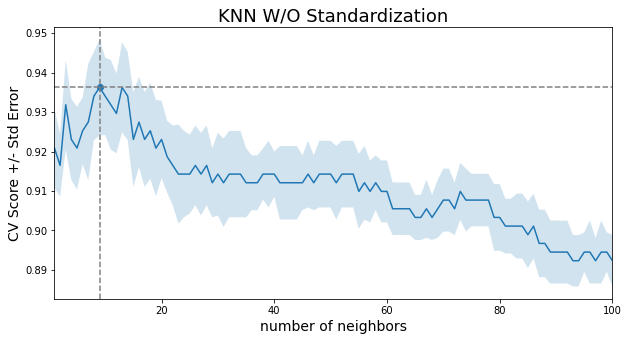

In [ ]:
optimal_n = best_estimator('KNN W/O Standardization',cv_score_list[0],cv_score_list[1])

### test accuracy

In [ ]:
#Train the best estimator with all data in the training set
best_knn = KNeighborsClassifier(n_neighbors=optimal_n)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
print('The test accuracy is ',best_knn.score(X_test,y_test))

The test accuracy is  0.9649122807017544


### random k values

In [ ]:
import random

In [ ]:
random_k=random.choices(k_space,k=5)
random_k

[28, 3, 31, 53, 22]

In [ ]:
for n in random_k:
  knn2=KNeighborsClassifier(n_neighbors=n)
  knn2.fit(X_train,y_train)
  acc=accuracy_score(y_test,knn2.predict(X_test))
  print('The test accuract for k = {} is {}'.format(n,acc))

The test accuract for k = 28 is 0.9649122807017544
The test accuract for k = 3 is 0.9122807017543859
The test accuract for k = 31 is 0.9473684210526315
The test accuract for k = 53 is 0.9473684210526315
The test accuract for k = 22 is 0.9649122807017544


## Part 3: Feature Selection
In the last part, we used all the features in our dataset to classify the tumors. Now we want to see:
* Are all of these features necessary to get the same level of accuracy on the test set? 
* Is it possible to get better accuracy with fewer features? 
* Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.

You should develop some experiments to investigate the answer of these questions.

### **Question**: Are all of these features necessary to get the same level of accuracy on the test set?
**Answer**: No. As shown in the graph and table below, with only two features, i.e., '**worst perimeter**' and '**mean texture**', we can get the same level of accuracy on the test set.


### **Question**: Is it possible to get better accuracy with fewer features?
**Answer**: In general, the answer is yes, because reducing the model complexity usually improves the test score. For own problem here, the accuracy is improved very little, from 96% to 97%. However, this improvemnt is shaky and heavily dependant on the randomness in train test split.

### **Question**: Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.
**Answer**: The last remaining feature in the backward elimination process is **worst perimeter**. Building a model with that feature only gives us an accuray of 92%, which is even more 95% of our orriginal accuracy with 30 features (96%).

So, the five most essential features, i.e., those that survived the elimination process are:
1. worst perimeter
2. mean texture 
3. mean perimeter
4. worst fractal dimension
5. worst symmetry


In [ ]:
# This function gives the training and test accuracy score for an arbitraty dataset of training and test
def train_test_score (model,train_X,train_y,test_X,test_y):
  num_f = train_X.shape[1]
    
  model.fit(train_X.values,train_y)
  train_pred = model.predict(train_X.values)
  test_pred = model.predict(test_X.values)
  train_acc = accuracy_score(train_y,train_pred)
  test_acc = accuracy_score(test_y,test_pred)
  return (num_f,train_acc,test_acc)

#### **BACKWARD ELIMINATION** Function

In [ ]:
# Function to find the worst feature and drop it out
def drop_worst_feature(temp_X_train_df,temp_X_test_df):
  model_Score_list=[]
  num_f = temp_X_train_df.shape[1]

  for j in np.arange(num_f):

    temp_X_train = pd.DataFrame(temp_X_train_df)
    temp_X_test = pd.DataFrame(temp_X_test_df)

    temp_X_train.drop(temp_X_train.columns[j], axis=1, inplace=True)
    temp_X_test.drop(temp_X_test.columns[j], axis=1, inplace=True)

    temp_knn = KNeighborsClassifier(n_neighbors=optimal_n,n_jobs=-1)
    
    model_Score_list.append(train_test_score(temp_knn,temp_X_train,y_train,temp_X_test,y_test))

  model_score_array = np.array(model_Score_list)

  # find the feature that does not have a significant effect in reducing the model accuracy 
  worst_feature_index = np.argmax(model_score_array[:,1])
  
  dropped_feature_name = temp_X_train_df.columns[worst_feature_index]
  # print('The removed feature is: ', dropped_feature_name)

  temp_X_train_df.drop(temp_X_train_df.columns[worst_feature_index], axis=1 , inplace=True)
  temp_X_test_df.drop(temp_X_test_df.columns[worst_feature_index], axis=1,  inplace=True)

  score_list = (num_f-1 , model_score_array[worst_feature_index][1] , model_score_array[worst_feature_index][2], dropped_feature_name)

  return score_list

In [ ]:
model_scores = []
temp_tr = pd.DataFrame(X_train)
temp_ts = pd.DataFrame(X_test)

knn3=KNeighborsClassifier(n_neighbors=optimal_n,n_jobs=-1)

# The model with all features
model_scores.append(train_test_score(knn3,X_train,y_train,X_test,y_test))

for i in np.arange(len(dataset.feature_names)-1):
  model_scores.append(drop_worst_feature(temp_tr,temp_ts))
  # print(temp_tr.shape)
  # print(temp_score)
print('The last remaining feature is: ', temp_tr.columns[0])

df_scores = pd.DataFrame(model_scores, columns=['num features','training score','test score','feature removed'])

df_scores

The last remaining feature is:  worst perimeter


,num features,training score,test score,feature removed
0,30,0.936264,0.964912,None
1,29,0.938462,0.921053,mean area
2,28,0.947253,0.956140,worst area
3,27,0.951648,0.956140,area error
4,26,0.951648,0.956140,mean radius
5,25,0.951648,0.956140,mean smoothness
6,24,0.951648,0.956140,mean compactness
7,23,0.951648,0.956140,mean concavity
8,22,0.951648,0.956140,mean concave points
9,21,0.951648,0.956140,mean symmetry


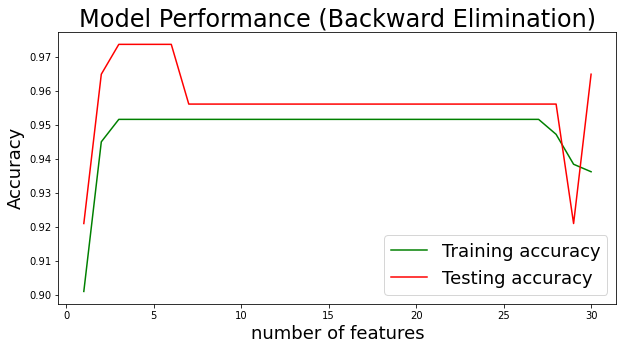

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(df_scores['num features'],df_scores['training score'],'g',label='Training accuracy')
plt.plot(df_scores['num features'],df_scores['test score'],'r',label='Testing accuracy')

plt.title("Model Performance (Backward Elimination)",fontsize = 24)
plt.xlabel("number of features",fontsize = 18)
plt.ylabel("Accuracy",fontsize = 18)
plt.legend(loc=4,fontsize=18)

# sns.lineplot(x='num features',y='test score',data=df_scores)

**Note**:

As shown above, with only one features ('**worst perimeter**') almost the same level of test accuracy is achieved. Here, I am going to verify that

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=optimal_n,n_jobs=-1)
nf,tr_score,ts_score=train_test_score(knn4,X_train[['worst perimeter']],y_train,X_test[['worst perimeter']],y_test)

print('The test accuracy is ', ts_score)
print('The training accuracy is ', tr_score)


The test accuracy is  0.9210526315789473
The training accuracy is  0.9010989010989011


## Part 4: Standardization
We are now going to compare the performance of our KNN model with and without standardizing the data.

As shown below, with standardization the performance of model on the training dataset is implroved a little bit. However, for the test data set, the performance decreases in a very short amount. In addition, the optimal number of neighbors for our classifier is obtained to be 5. 

I think that for this specific problem we are daeling with here, standardization does not make a huge difference. Nonetheles, I beleive it is necessary to apply standardization for distance based estimators, such as knn. The results would be more real.

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
def cv_pipeline_score(k):
  temp_pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=k,n_jobs=-1))
  scores_mean = cross_val_score(temp_pipeline,X_train,y_train,cv=5).mean()
  scores_std = cross_val_score(temp_pipeline,X_train,y_train,cv=5).std()
  return scores_mean,scores_std
  
score_pipeline_fun = np.vectorize(cv_pipeline_score)

In [ ]:
cv_pipeline_score_list = score_pipeline_fun(k_space)

In [ ]:
def best_estimator_pipeline(plot_title,cv_scores, cv_scores_std,cv_scores1, cv_scores_std1):
    highest_score = np.max(cv_scores)
    best_k = np.argmax(cv_scores)+1
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_space, cv_scores,markevery=[np.argmax(cv_scores)],marker='o',label='With Standardization')
    ax.plot(k_space, cv_scores1,label='Without Standardization')

    std_error = cv_scores_std / np.sqrt(5)
    std_error1 = cv_scores_std1 / np.sqrt(5)

    ax.fill_between(k_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.fill_between(k_space, cv_scores1 + std_error1, cv_scores1 - std_error1, alpha=0.2)

    ax.set_ylabel('Training CV Score +/- Std Error',fontsize=14)
    ax.set_xlabel('number of neighbors',fontsize=14)
    plt.title(plot_title,fontsize=18)

    ax.axhline(highest_score, linestyle='--', color='.5')
    ax.axvline(best_k, linestyle='--', color='.5')

    print('Best cross validation accuracy achieved with Standardization = ', highest_score )
    print('optimal number of neighbors with Standardization = ', best_k)

    ax.set_xlim([k_space[0], k_space[-1]])
    plt.legend(loc=1,fontsize=12)

    plt.show()
    return best_k

Best cross validation accuracy achieved with Standardization =  0.9648351648351647
optimal number of neighbors with Standardization =  5


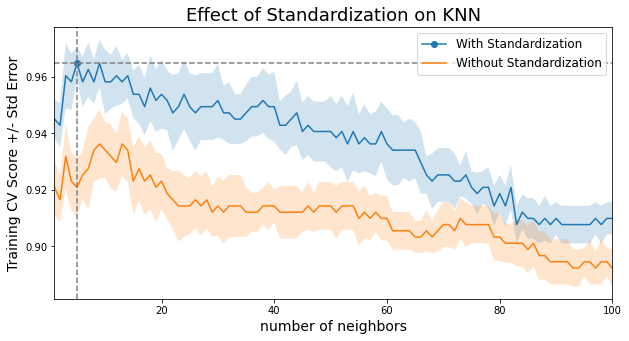

In [ ]:
optimal_pipeline_n = best_estimator_pipeline('Effect of Standardization on KNN',cv_pipeline_score_list[0],cv_pipeline_score_list[1],cv_score_list[0],cv_score_list[1])


In [ ]:
#Train the best knn+scaler with all data in the training set
best_scaler_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=optimal_pipeline_n,n_jobs=-1))
nf,tr_sc_p,ts_sc_p = train_test_score(best_scaler_knn,X_train,y_train,X_test,y_test)

In [ ]:
# scores for knn without standardization
nf,tr_sc,ts_sc = train_test_score(best_knn,X_train,y_train,X_test,y_test)

In [ ]:
comparison_df = pd.DataFrame([[optimal_n,tr_sc,ts_sc],[optimal_pipeline_n,tr_sc_p,ts_sc_p]],columns=['optimal n','training score','test score'],index=['KNN without standardization','KNN with standardization'])
comparison_df

,optimal n,training score,test score
KNN without standardization,9,0.936264,0.964912
KNN with standardization,5,0.978022,0.956140
